# Анализ оттока клиентов банка "Метанпром"

### Цель проекта: 

Проанализировать клиентов регионального банка и выделить сегменты клиентов, которые склонны уходить из банка. Адаптировать имеющие в банке продукты, чтобы в конечном итоге сократить число "отточных" пользователей. 

### Суть проекта:

#### Имеющиеся данные:

Файл /datasets/bank_scrooge.csv

* userid — идентификатор пользователя,
* score — баллы кредитного скоринга,
* City — город,
* Gender — пол,
* Age — возраст,
* equity — количество баллов собственности,
* Balance — баланс на счёте,
* Products — количество продуктов, которыми пользуется клиент,
* CreditCard — есть ли кредитная карта,
* last_activity — активный клиент,
* est_salary — заработная плата клиента,
* Churn — ушёл или нет.

#### Декомпозиция проекта:

##### Загрузка данных
Данные находятся в файле /datasets/bank_scrooge.csv

##### Проведение исследовательского анализа данных: 

###### Заполнение пропущенных значений, изучение средних значений и стандартных отклонений
Рассмотрение каждого столбца по очереди - привести названия к нижнему регистру, избавиться от пропусков и аномалий, привести к нужному типу (при необходимости), построить графики. Кодировка столбцов, содержащих в себе информацию про пол и города.

###### Сравнение двух групп клиентов - тех, кто намеревается уйти, и тех, кто остается
Построение столбчатых гистограмм для каждой из групп клиентов, чтобы выявить ключевые различия; построение матрицы корреляций. Выделение наиболее явных признаков "отточности" клиентов. 

##### На основе проведенного анализа и выявленных признаков "отточности" сформулировать две гипотезы (одна из них - доход между теми клиентами, которые ушли и теми, которые остались, не отличается) и проверить их.

##### Сегментация клиентов по группам

На основе ключевых характеристик (например, возраст, размер з/п и количество продуктов) определить и разделить отточных клиентов на сегменты.

##### Рекомендации отделу маркетинга 

Подвести общий итог на основе промежуточных выводов по каждому пункту. Предложить маркетологам внести правки в работу с "отточными" клиентами.

Построить дашборд, сделать презентацию

### Загрузка данных

In [1]:
import pandas as pd # загружаем библиотеки
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statistics
from scipy import stats as st
import math as mth

In [2]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv') # открываем датасет

In [3]:
df.head()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


In [5]:
df.describe()

,USERID,score,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
count,10000.00000,10000.000000,9974.000000,10000.000000,7.705000e+03,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,171814.71260,848.699400,42.734409,2.627600,8.277943e+05,1.870100,0.680400,0.523500,1.478669e+05,0.182000
std,33708.23812,65.448519,12.179971,1.980836,1.980614e+06,0.792647,0.466345,0.499472,1.393885e+05,0.385864
min,94561.00000,642.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,142810.25000,802.000000,33.000000,0.000000,2.955542e+05,1.000000,0.000000,0.000000,7.525190e+04,0.000000
50%,172728.00000,853.000000,40.000000,3.000000,5.242722e+05,2.000000,1.000000,1.000000,1.196581e+05,0.000000
75%,201261.75000,900.000000,51.000000,4.000000,9.807058e+05,2.000000,1.000000,1.000000,1.745005e+05,0.000000
max,229145.00000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
USERID,10000.0,171814.712600,3.370824e+04,94561.0,142810.25,172728.000,201261.7500,2.291450e+05
score,10000.0,848.699400,6.544852e+01,642.0,802.00,853.000,900.0000,1.000000e+03
age,9974.0,42.734409,1.217997e+01,18.0,33.00,40.000,51.0000,8.600000e+01
equity,10000.0,2.627600,1.980836e+00,0.0,0.00,3.000,4.0000,9.000000e+00
balance,7705.0,827794.306510,1.980614e+06,0.0,295554.16,524272.200,980705.8500,1.191136e+08
products,10000.0,1.870100,7.926467e-01,0.0,1.00,2.000,2.0000,5.000000e+00
credit_card,10000.0,0.680400,4.663449e-01,0.0,0.00,1.000,1.0000,1.000000e+00
last_activity,10000.0,0.523500,4.994724e-01,0.0,0.00,1.000,1.0000,1.000000e+00
EST_SALARY,10000.0,147866.885544,1.393885e+05,2546.3,75251.90,119658.105,174500.5425,1.395064e+06
churn,10000.0,0.182000,3.858638e-01,0.0,0.00,0.000,0.0000,1.000000e+00


In [7]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

Всего датасет включает в себя 10 тысяч строк. В двух столбцах наблюдаются пропуски. Переходим к предобработке. 

### Проведение исследовательского анализа данных: 

#### Заполнение пропущенных значений, изучение средних значений и стандартных отклонений

In [8]:
df.columns = df.columns.str.lower() # приводим названия столбцов к нижнему регистру

In [9]:
df.rename(columns = {'userid':'user_id'}, inplace = True)

In [10]:
df.duplicated().sum()  # явные дупликаты отсутствуют

0

In [11]:
df['user_id'].nunique() # уникальных значений user_id меньшше, чем строк. Соответственно, здесь есть повторы

9927

In [12]:
df[df['user_id'].duplicated()].sort_values(by='user_id')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
7694,116540,887.000,Ярославль,Ж,38.000,0,NaN,1,0,1,119247.610,0
7542,117943,880.000,Ярославль,Ж,40.000,0,NaN,1,1,0,137718.930,0
5896,120258,905.000,Ярославль,М,30.000,0,NaN,1,1,1,146427.960,0
8638,123461,934.000,Рыбинск,М,34.000,0,NaN,2,1,0,291619.270,0
9775,124450,758.000,Рыбинск,Ж,36.000,0,73574.070,2,0,1,79963.590,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9104,222480,776.000,Рыбинск,Ж,NaN,5,796735.090,1,1,1,55073.630,0
8070,226550,940.000,Рыбинск,М,NaN,0,NaN,1,0,1,147696.950,0
4216,226719,903.000,Рыбинск,Ж,63.000,0,NaN,1,1,0,138582.580,0
8497,227795,839.000,Ярославль,М,34.000,2,326593.140,2,1,0,103314.920,0


In [13]:
df[df['user_id']==116540]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1893,116540,883.000,Рыбинск,Ж,55.000,1,362756.490,3,0,1,175920.480,1
7694,116540,887.000,Ярославль,Ж,38.000,0,NaN,1,0,1,119247.610,0


In [14]:
df[df['user_id']==117943]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
4866,117943,855.000,Рыбинск,Ж,32.000,6,1036832.930,4,1,1,107792.710,1
7542,117943,880.000,Ярославль,Ж,40.000,0,NaN,1,1,0,137718.930,0


In [15]:
df[df['user_id']==228075]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1247,228075,932.000,Ярославль,М,NaN,5,7601719.200,2,1,1,408121.160,0
6457,228075,839.000,Рыбинск,М,39.000,5,507199.850,3,0,1,85195.800,0


Взаимосвязи между одинаковыми user_id не наблюдается. Очевидно, номера были присвоеными разными филиалами. Оставляем как есть.

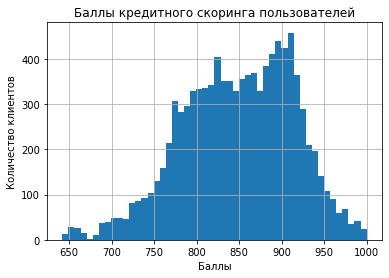

In [16]:
df['score'].hist(bins=50)
plt.xlabel('Баллы')
plt.ylabel('Количество клиентов')
plt.title('Баллы кредитного скоринга пользователей')
plt.show()

In [17]:
df.query('score >990')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
125,227092,1000.000,Ярославль,М,32.000,5,19757180.850,2,1,1,1024626.500,0
323,116936,993.000,Ярославль,М,36.000,5,853635.890,2,1,0,132313.310,0
776,203595,992.000,Ярославль,Ж,57.000,2,589480.050,1,1,1,123965.220,0
1027,119793,1000.000,Ярославль,М,50.000,5,12909691.020,1,1,0,1253653.400,0
1081,119535,997.000,Рыбинск,Ж,28.000,1,70301.620,2,1,0,23122.900,0
2518,122481,991.000,Рыбинск,Ж,66.000,5,6349258.590,2,1,0,671772.240,0
2739,180502,991.000,Ярославль,Ж,34.000,0,232323.080,2,1,1,82165.220,0
2794,220937,992.000,Ярославль,Ж,49.000,4,567457.170,3,0,0,145538.970,0
2981,193732,996.000,Ярославль,М,44.000,4,980897.130,2,1,1,79896.700,0
3103,203255,999.000,Ярославль,М,36.000,4,10641153.660,2,0,0,1042118.220,0


In [18]:
df.query('score < 650')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
265,157448,649.000,Рыбинск,М,37.000,0,NaN,1,1,1,81942.850,0
533,146648,649.000,Ярославль,М,33.000,0,NaN,1,1,1,149318.490,0
921,179302,646.000,Ярославль,М,37.000,0,NaN,1,1,1,148297.710,0
2532,151179,642.000,Рыбинск,М,69.000,0,NaN,1,1,1,35917.410,0
3168,173067,649.000,Ярославль,М,46.000,0,NaN,1,1,1,121654.310,0
4071,164000,648.000,Ярославль,М,28.000,0,NaN,1,1,0,27790.150,0
4690,135725,648.000,Ярославль,Ж,59.000,0,NaN,1,1,1,50326.030,0
5131,213745,646.000,Рыбинск,Ж,25.000,0,NaN,2,1,0,60562.330,0
6454,169067,649.000,Ярославль,М,55.000,0,NaN,1,1,1,130672.400,0
6751,182172,649.000,Ярославль,М,38.000,0,NaN,1,1,1,170288.900,0


Мы не знаем наверняка, как именно раздаются баллы скоринга. Что касается клиентов с низкими баллами - большинство из них пользуются только одним банковским продуктом (и это кредитная карта), баланс неизвестен, заработная плата, за исключением одного человека, не превышает 150 т.р. С пользователями, у который кредитный рейтинг приближен к максимальному, сложнее - среди людей, у которых есть множество объектов недвижимости, большой баланс на счету и высокая зарплата, есть и те, чьи финансовые показатели невелики. Поскольку мы не знаем полной истории взаимодействия таких клиентов с банком (может быть, в прошлом они брали много кредитов и оперативно их выплачивали), то лучше оставить всех пользователей как есть и ничего в датасете не менять. 

In [19]:
df['city'].value_counts() # больше всего клиентов в Ярославле, меньше всего - в Ростове. 

Ярославль    5888
Рыбинск      2695
Ростов       1417
Name: city, dtype: int64

In [20]:
df['town']=df['city']

In [21]:
df = pd.get_dummies(df, columns=['town']) # создаем фиктивные переменные вместо столбца "город"

In [22]:
df.rename(columns = {'town_Ростов':'rostov', 'town_Рыбинск':'rybinsk', 'town_Ярославль': 'yaroslavl'}, inplace = True)

In [23]:
df['gender'].value_counts() # Мужчин и женщин поровну

М    5005
Ж    4995
Name: gender, dtype: int64

In [24]:
df['sex'] = df['gender']

In [25]:
df = pd.get_dummies(df, columns=['sex']) # создаем фиктивные переменные вместо столбца "пол"

In [26]:
df.rename(columns = {'sex_Ж':'female', 'sex_М':'male'}, inplace = True)

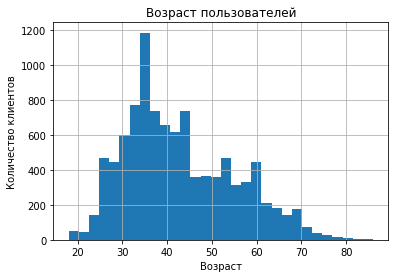

In [27]:
df['age'].hist(bins=30)
plt.xlabel('Возраст')
plt.ylabel('Количество клиентов')
plt.title('Возраст пользователей')
plt.show()

Больше всего клиентов в возрастном диапазоне 33-36 лет.

In [28]:
df.query('age < 18') # слишком молодых клиентов нет

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,rostov,rybinsk,yaroslavl,female,male


In [29]:
df.query('age > 80')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,rostov,rybinsk,yaroslavl,female,male
1621,151166,916.000,Рыбинск,Ж,83.000,0,NaN,1,1,1,55681.820,0,0,1,0,1,0
1987,219132,827.000,Рыбинск,Ж,82.000,3,275391.310,2,0,0,59205.900,0,0,1,0,1,0
2063,115610,823.000,Ярославль,Ж,81.000,2,139576.560,2,0,1,146201.010,0,0,0,1,1,0
2795,214518,820.000,Ярославль,Ж,83.000,3,1137456.030,3,0,0,18037.970,0,0,0,1,1,0
3272,207759,888.000,Ярославль,Ж,84.000,3,1287558.900,2,0,1,97982.170,0,0,0,1,1,0
4387,117913,658.000,Рыбинск,Ж,81.000,0,NaN,1,1,1,105088.100,0,0,1,0,1,0
5602,151854,707.000,Ярославль,Ж,81.000,0,NaN,1,1,0,102360.770,0,0,0,1,1,0
5673,147965,854.000,Ярославль,Ж,81.000,3,803337.980,2,0,1,50386.820,0,0,0,1,1,0
8237,208065,785.000,Рыбинск,Ж,82.000,2,1221645.780,3,1,1,66059.880,0,0,1,0,1,0
9176,116838,777.000,Ярославль,Ж,86.000,3,772929.830,1,1,1,40877.180,0,0,0,1,1,0


In [30]:
df[df['age'].isnull()]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,rostov,rybinsk,yaroslavl,female,male
1247,228075,932.000,Ярославль,М,NaN,5,7601719.200,2,1,1,408121.160,0,0,0,1,0,1
2165,187635,692.000,Рыбинск,Ж,NaN,0,NaN,1,1,1,160368.820,0,0,1,0,1,0
2444,221156,913.000,Ярославль,М,NaN,0,NaN,1,1,1,135693.240,0,0,0,1,0,1
3091,138660,836.000,Ростов,Ж,NaN,5,294315.530,2,0,1,63310.220,1,1,0,0,1,0
4912,210674,834.000,Рыбинск,М,NaN,1,238330.520,2,0,1,93775.060,0,0,1,0,0,1
5470,218868,827.000,Рыбинск,Ж,NaN,4,448959.070,2,1,1,67835.950,0,0,1,0,1,0
5495,151662,884.000,Рыбинск,Ж,NaN,0,NaN,1,1,1,137500.770,0,0,1,0,1,0
7236,210135,908.000,Рыбинск,Ж,NaN,4,1120340.310,3,1,1,85002.150,0,0,1,0,1,0
7248,219343,920.000,Рыбинск,Ж,NaN,0,NaN,1,1,0,159248.670,0,0,1,0,1,0
7345,184913,829.000,Ярославль,Ж,NaN,3,188648.770,2,0,1,75206.900,0,0,0,1,1,0


Пропусков немного, взаимосвязи между данными строками не наблюдается. С чем связана природа появление пропусков также неизвестно. Если от них избавимся, анализ не пострадает. 

In [31]:
df.dropna(subset=['age'], inplace=True)

In [32]:
df['age'] = df['age'].astype('int64')

In [33]:
df['equity'].value_counts()

0    2576
5    1915
4    1847
3    1541
2    1051
1     773
6     161
7      80
8      17
9      13
Name: equity, dtype: int64

In [34]:
df.query('equity >= 8')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,rostov,rybinsk,yaroslavl,female,male
554,216542,816.000,Рыбинск,М,56,8,715209.230,2,0,0,43378.560,1,0,1,0,0,1
702,154919,899.000,Ярославль,Ж,62,8,595650.870,2,0,0,53001.570,0,0,0,1,1,0
1325,185429,904.000,Рыбинск,Ж,39,9,825088.950,2,1,0,154052.500,0,0,1,0,1,0
1474,143908,925.000,Ярославль,М,29,9,660800.530,2,1,0,61601.260,0,0,0,1,0,1
1613,191964,930.000,Ростов,М,28,8,709251.460,2,1,1,106683.430,1,1,0,0,0,1
2305,156036,857.000,Рыбинск,Ж,39,8,328157.600,1,0,1,101326.680,0,0,1,0,1,0
3558,198854,832.000,Ростов,М,53,9,551731.840,2,1,0,87812.450,0,1,0,0,0,1
3953,228626,886.000,Ярославль,М,41,9,1820479.250,2,0,1,116361.340,1,0,0,1,0,1
4313,228608,954.000,Ярославль,М,54,8,6716013.740,2,0,1,319399.940,0,0,0,1,0,1
4522,213658,936.000,Ярославль,М,40,9,1135311.630,2,0,1,282698.160,1,0,0,1,0,1


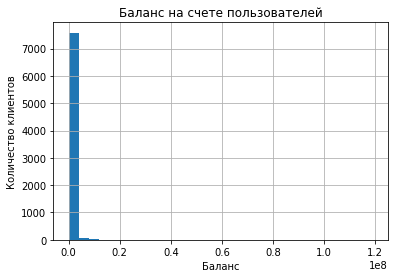

In [35]:
df['balance'].hist(bins=30)
plt.xlabel('Баланс')
plt.ylabel('Количество клиентов')
plt.title('Баланс на счете пользователей')
plt.show()

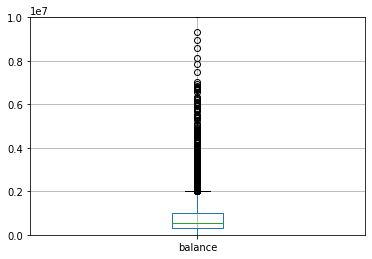

In [36]:
plt.ylim(0,10000000)
df.boxplot('balance')
plt.show()

In [37]:
df.query('balance > 10000000')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,rostov,rybinsk,yaroslavl,female,male
125,227092,1000.000,Ярославль,М,32,5,19757180.850,2,1,1,1024626.500,0,0,0,1,0,1
1027,119793,1000.000,Ярославль,М,50,5,12909691.020,1,1,0,1253653.400,0,0,0,1,0,1
1059,114103,894.000,Ярославль,М,58,4,64866210.150,2,1,1,88861.600,1,0,0,1,0,1
1846,114088,927.000,Ярославль,М,57,5,43277099.840,3,0,1,82619.000,0,0,0,1,0,1
2068,201574,983.000,Ярославль,М,54,3,11060145.420,2,0,1,1046662.180,0,0,0,1,0,1
2318,168713,837.000,Ярославль,М,62,5,12823205.040,1,1,1,21765.760,0,0,0,1,0,1
2597,226719,990.000,Ярославль,М,37,4,14648692.140,2,0,0,934412.610,1,0,0,1,0,1
3103,203255,999.000,Ярославль,М,36,4,10641153.660,2,0,0,1042118.220,0,0,0,1,0,1
3180,193249,960.000,Ростов,М,47,5,11834882.670,2,0,1,507039.170,1,1,0,0,0,1
3348,193457,1000.000,Ярославль,Ж,34,4,10885990.870,4,1,1,799847.280,0,0,0,1,1,0


В датасете есть какие-то крайне высокие значения балансового счета у некоторых клиентов, при этом их средняя зарплата может быть невысока. Природу появления денежных средств мы не знаем (возможно, это продажа имущества), при этом их рейтинг и оценка недвижимого имущества высоки. Оставляем данные как есть. 

In [38]:
df[df['balance'].isnull()]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,rostov,rybinsk,yaroslavl,female,male
2,120722,892.000,Рыбинск,Ж,30,0,NaN,1,1,1,107683.340,0,0,1,0,1,0
9,133130,906.000,Ярославль,Ж,67,0,NaN,1,0,1,238055.530,0,0,0,1,1,0
10,148929,927.000,Ростов,М,52,0,NaN,1,1,1,196820.070,0,1,0,0,0,1
11,172184,921.000,Ростов,М,41,0,NaN,1,1,1,217469.480,0,1,0,0,0,1
19,127034,922.000,Рыбинск,Ж,53,0,NaN,1,0,0,147094.820,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9976,208085,876.000,Ростов,М,38,0,NaN,1,0,0,171763.690,0,1,0,0,0,1
9984,125941,729.000,Ярославль,Ж,42,0,NaN,1,1,1,687538.700,0,0,0,1,1,0
9993,219924,884.000,Рыбинск,Ж,36,0,NaN,1,1,1,169844.880,0,0,1,0,1,0
9996,139170,894.000,Ярославль,М,46,0,NaN,1,1,0,196898.290,0,0,0,1,0,1


Пропусков в балансе много, причина их появления неизвестна. Посмотрим корреляцию баланса на счете с другими показателями, чтобы выяснить, как их можно заполнить. 

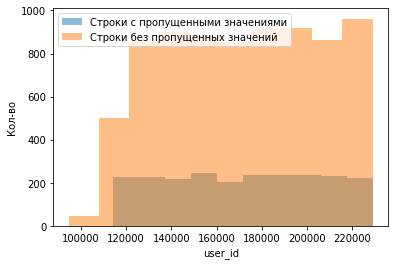

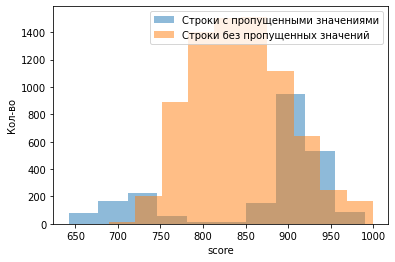

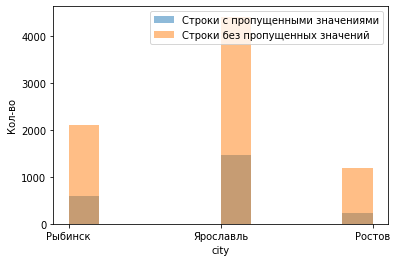

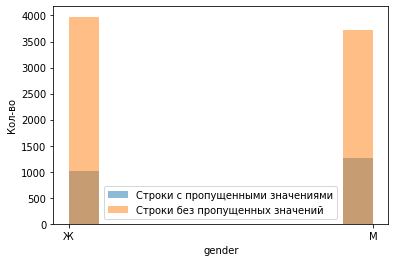

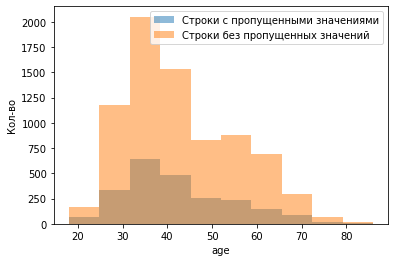

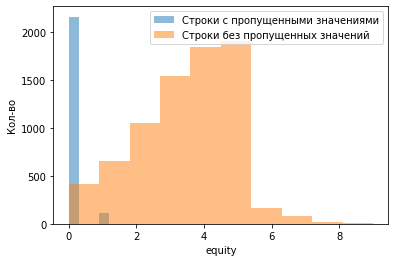

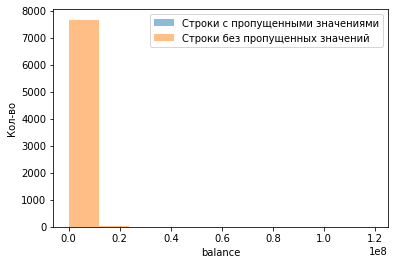

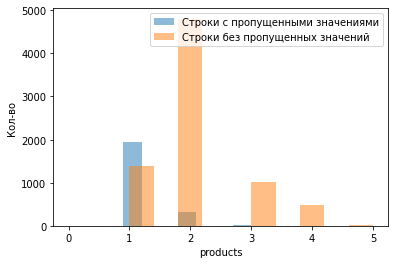

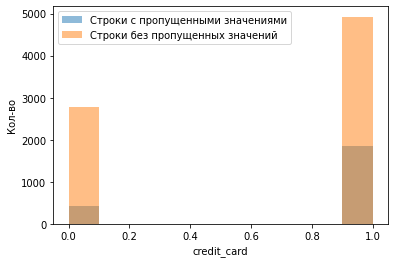

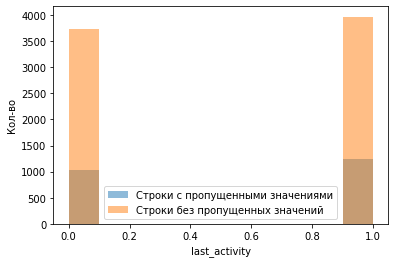

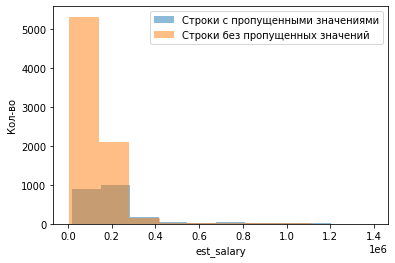

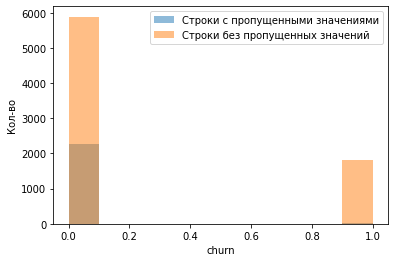

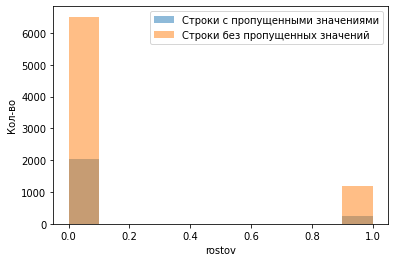

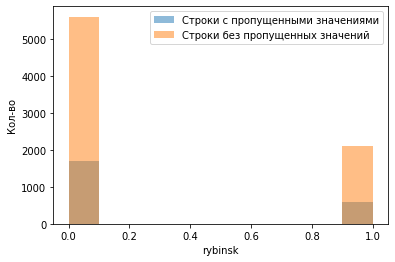

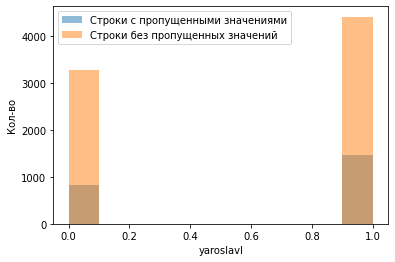

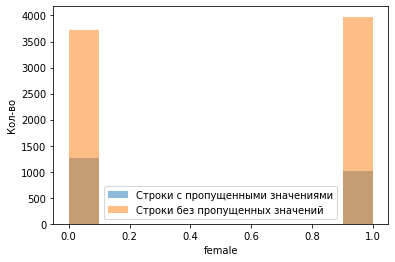

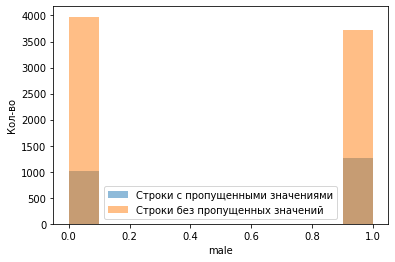

In [39]:
data_with_null = df[df['balance'].isnull()]
data_without_null = df[~df['balance'].isnull()]

# Цикл для построения гистограмм для каждого столбца
for column in df.columns:
    plt.figure()
    plt.hist(data_with_null[column].dropna(), alpha=0.5, label='Строки с пропущенными значениями')
    plt.hist(data_without_null[column].dropna(), alpha=0.5, label='Строки без пропущенных значений')
    plt.xlabel(column)
    plt.ylabel('Кол-во')
    plt.legend()


plt.show()

In [40]:
df.groupby(df['balance'].isnull())['city'].value_counts(normalize=True)

balance  city     
False    Ярославль   0.574
         Рыбинск     0.273
         Ростов      0.153
True     Ярославль   0.640
         Рыбинск     0.257
         Ростов      0.103
Name: city, dtype: float64

In [41]:
df.groupby(df['balance'].isnull())['gender'].value_counts(normalize=True)

balance  gender
False    Ж        0.517
         М        0.483
True     М        0.558
         Ж        0.442
Name: gender, dtype: float64

In [42]:
df.groupby(df['balance'].isnull())['products'].value_counts(normalize=True)

balance  products
False    2          0.624
         1          0.181
         3          0.131
         4          0.062
         5          0.002
True     1          0.849
         2          0.138
         3          0.013
         0          0.000
Name: products, dtype: float64

In [43]:
df.groupby(df['balance'].isnull())['credit_card'].value_counts(normalize=True)

balance  credit_card
False    1             0.640
         0             0.360
True     1             0.815
         0             0.185
Name: credit_card, dtype: float64

In [44]:
df.groupby(df['balance'].isnull())['last_activity'].value_counts(normalize=True)

balance  last_activity
False    1               0.515
         0               0.485
True     1               0.549
         0               0.451
Name: last_activity, dtype: float64

In [45]:
df.groupby(df['balance'].isnull())['churn'].value_counts(normalize=True)

balance  churn
False    0       0.765
         1       0.235
True     0       0.994
         1       0.006
Name: churn, dtype: float64

In [46]:
df['balance'].corr(df['est_salary'],method='pearson')

0.33880041620772056

In [47]:
df['balance'].corr(df['age'],method='pearson')

0.06974503837754409

In [48]:
df['balance'].corr(df['score'],method='pearson')

0.23528347012917855

In [49]:
df['balance'].corr(df['equity'],method='pearson')

0.16379303581636256

In [50]:
df['balance'].corr(df['products'],method='pearson')

0.07571635643107173

In [51]:
df['balance'].corr(df['churn'],method='pearson')

0.0859148770603546

Корреляция баланса на счете с каким-то одним другим показателем не прослеживается. 

Делить группы пользователей по est_salary и проставлять медианные значения кажется некорректным - у клиентов могут быть большой баланс на счете при мизерной зарплате и наоборот. Пропуски в данном столбце могут быть связаны: с отсутствием счета как такового, отсутствием баланса на счете (в таком случае пропуски означают 0), технической ошибкой. Можно попробовать заполнить пропуски отталкиваясь от здравого смысла и взять несколько столбцов, например, город проживания, возраст, пол, кол-во продуктов, наличию кредитной карты. 

In [52]:
old_balance = df['balance'].copy()

In [53]:
df['balance']=df.groupby(['city','gender','products','age','credit_card','churn'])['balance'].transform(lambda x: x.fillna(x.mean()))

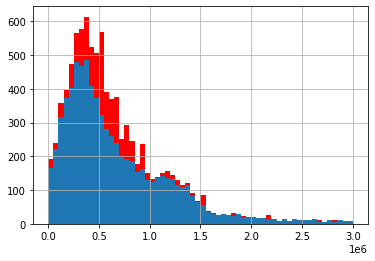

In [54]:
top, step = 3e6, 5e4
bins = np.arange(0,top+step,step)
df.balance.hist(bins=bins, color='r')
old_balance.hist(bins=bins);  

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9974 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9974 non-null   int64  
 1   score          9974 non-null   float64
 2   city           9974 non-null   object 
 3   gender         9974 non-null   object 
 4   age            9974 non-null   int64  
 5   equity         9974 non-null   int64  
 6   balance        9563 non-null   float64
 7   products       9974 non-null   int64  
 8   credit_card    9974 non-null   int64  
 9   last_activity  9974 non-null   int64  
 10  est_salary     9974 non-null   float64
 11  churn          9974 non-null   int64  
 12  rostov         9974 non-null   uint8  
 13  rybinsk        9974 non-null   uint8  
 14  yaroslavl      9974 non-null   uint8  
 15  female         9974 non-null   uint8  
 16  male           9974 non-null   uint8  
dtypes: float64(3), int64(7), object(2), uint8(5)
memory 

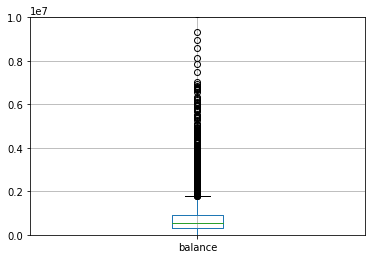

In [56]:
plt.ylim(0,10000000)
df.boxplot('balance')
plt.show()

Немного увеличилось число выбросов.

In [57]:
df[df['balance'].isnull()]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,rostov,rybinsk,yaroslavl,female,male
9,133130,906.000,Ярославль,Ж,67,0,NaN,1,0,1,238055.530,0,0,0,1,1,0
21,177415,896.000,Рыбинск,Ж,47,0,NaN,1,0,0,225060.350,0,0,1,0,1,0
223,180144,921.000,Ярославль,Ж,62,0,NaN,1,0,1,85312.420,0,0,0,1,1,0
253,220825,908.000,Рыбинск,Ж,35,0,NaN,1,0,1,94896.190,0,0,1,0,1,0
255,219624,906.000,Ростов,Ж,77,0,NaN,1,1,0,138937.870,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9888,216904,900.000,Ярославль,М,31,0,NaN,1,0,1,125161.360,0,0,0,1,0,1
9903,203506,894.000,Ростов,Ж,68,0,NaN,1,1,1,174767.170,0,1,0,0,1,0
9905,146326,883.000,Рыбинск,М,47,0,NaN,1,0,1,234233.480,0,0,1,0,0,1
9907,190839,925.000,Рыбинск,Ж,57,0,NaN,1,0,1,146407.760,0,0,1,0,1,0


От оставшихся пропусков можем избавиться.

In [58]:
df.dropna(subset=['balance'], inplace=True)

In [59]:
df['products'].value_counts()

2    5115
1    2922
3    1033
4     474
5      19
Name: products, dtype: int64

In [60]:
df.query('products == 5')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,rostov,rybinsk,yaroslavl,female,male
401,187761,868.000,Ярославль,Ж,19,4,8126.880,5,1,1,85323.980,0,0,0,1,1,0
523,195914,852.000,Ярославль,Ж,39,5,1388255.700,5,1,1,135432.480,1,0,0,1,1,0
893,132781,820.000,Ярославль,М,37,5,259677.160,5,1,1,124261.010,0,0,0,1,0,1
1019,122402,833.000,Ростов,М,32,3,234560.940,5,1,1,106033.790,0,1,0,0,0,1
1346,159649,847.000,Ярославль,Ж,39,1,137974.020,5,1,1,219672.260,0,0,0,1,1,0
1479,209431,882.000,Рыбинск,М,42,4,1142013.060,5,1,0,101051.780,1,0,1,0,0,1
1880,134758,850.000,Ярославль,Ж,35,4,282262.330,5,1,1,105312.070,0,0,0,1,1,0
3274,155765,863.000,Ярославль,М,30,5,1036114.500,5,1,1,150744.500,1,0,0,1,0,1
3809,191408,838.000,Ростов,М,28,2,99461.510,5,1,1,88641.840,0,1,0,0,0,1
3884,138642,823.000,Ярославль,Ж,37,1,118329.870,5,1,1,105095.050,0,0,0,1,1,0


In [61]:
df['credit_card'].value_counts()

1    6660
0    2903
Name: credit_card, dtype: int64

In [62]:
df['last_activity'].value_counts()

1    4980
0    4583
Name: last_activity, dtype: int64

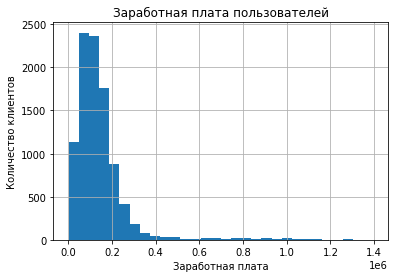

In [63]:
df['est_salary'].hist(bins=30)
plt.xlabel('Заработная плата')
plt.ylabel('Количество клиентов')
plt.title('Заработная плата пользователей')
plt.show()

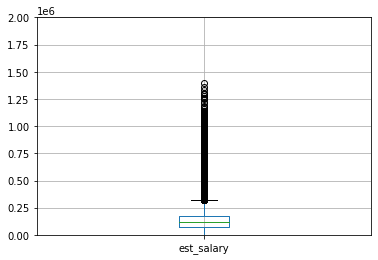

In [64]:
plt.ylim(0,2000000)
df.boxplot('est_salary')
plt.show()

In [65]:
df.query('est_salary <= 10000')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,rostov,rybinsk,yaroslavl,female,male
505,205035,725.000,Рыбинск,Ж,77,3,73.000,2,0,1,8729.840,0,0,1,0,1,0
1700,155567,747.000,Ростов,М,25,0,5750.920,1,1,0,7054.820,0,1,0,0,0,1
1753,161271,836.000,Ярославль,Ж,19,4,7703.050,4,1,1,5043.140,0,0,0,1,1,0
1883,151268,852.000,Ростов,Ж,63,5,373070.370,1,1,1,8587.790,0,1,0,0,1,0
1988,160979,788.000,Рыбинск,М,24,4,118438.820,2,1,0,8401.970,0,0,1,0,0,1
2174,143340,830.000,Ярославль,Ж,72,2,294375.630,3,1,1,8032.180,0,0,0,1,1,0
2186,201407,938.000,Рыбинск,Ж,69,1,325483.520,3,0,1,3487.330,0,0,1,0,1,0
2663,140105,821.000,Ростов,Ж,75,7,631805.720,1,1,0,8894.570,0,1,0,0,1,0
3606,187819,839.000,Рыбинск,Ж,56,5,1027438.020,2,0,0,7571.800,0,0,1,0,1,0
3689,219561,817.000,Ростов,М,25,3,121065.390,4,1,1,7522.140,0,1,0,0,0,1


In [66]:
df.query('est_salary > 1000000')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,rostov,rybinsk,yaroslavl,female,male
125,227092,1000.000,Ярославль,М,32,5,19757180.850,2,1,1,1024626.500,0,0,0,1,0,1
149,218801,958.000,Ярославль,М,34,0,686747.138,1,1,0,1292825.740,0,0,0,1,0,1
178,226887,890.000,Ярославль,М,49,4,3956103.100,2,1,0,1120528.700,0,0,0,1,0,1
250,210357,766.000,Ярославль,М,27,0,1288128.808,1,1,0,1015754.120,0,0,0,1,0,1
296,204143,925.000,Ярославль,М,25,0,183916.021,2,1,0,1001009.400,0,0,0,1,0,1
302,164876,942.000,Ярославль,М,40,0,476849.970,1,1,0,1256537.740,0,0,0,1,0,1
663,180853,949.000,Ярославль,М,45,0,573949.704,1,1,0,1142166.480,0,0,0,1,0,1
996,127574,749.000,Ярославль,М,35,0,510245.872,1,1,0,1071600.780,0,0,0,1,0,1
1027,119793,1000.000,Ярославль,М,50,5,12909691.020,1,1,0,1253653.400,0,0,0,1,0,1
1273,136567,961.000,Ярославль,М,31,0,468574.677,1,1,0,1015386.140,1,0,0,1,0,1


Все клиенты, получающие более 1 млн рублей в месяц, из Ярославля. У многих достаточно высокий кредитный рейтинг. Здесь могут быть аномалии (например, отсутствует информация о кол-ве объектов недвижимости), но доподлинно неизвестно, сообщали ли они в банк о своей собственности (плюс это может быть не единственный счет), поэтому оставляем как есть. 

In [67]:
df['churn'].value_counts()

0    7751
1    1812
Name: churn, dtype: int64

Таким образом, завершили предобработку - привели названия столбцов к нижнему регистру, посмотрели данные на предмет аномалий, избавились от пропусков, создали новые столбцы. В целом, датафрейм готов к дальнейшему анализу. 

In [69]:
df.query('products==5')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,rostov,rybinsk,yaroslavl,female,male
401,187761,868.000,Ярославль,Ж,19,4,8126.880,5,1,1,85323.980,0,0,0,1,1,0
523,195914,852.000,Ярославль,Ж,39,5,1388255.700,5,1,1,135432.480,1,0,0,1,1,0
893,132781,820.000,Ярославль,М,37,5,259677.160,5,1,1,124261.010,0,0,0,1,0,1
1019,122402,833.000,Ростов,М,32,3,234560.940,5,1,1,106033.790,0,1,0,0,0,1
1346,159649,847.000,Ярославль,Ж,39,1,137974.020,5,1,1,219672.260,0,0,0,1,1,0
1479,209431,882.000,Рыбинск,М,42,4,1142013.060,5,1,0,101051.780,1,0,1,0,0,1
1880,134758,850.000,Ярославль,Ж,35,4,282262.330,5,1,1,105312.070,0,0,0,1,1,0
3274,155765,863.000,Ярославль,М,30,5,1036114.500,5,1,1,150744.500,1,0,0,1,0,1
3809,191408,838.000,Ростов,М,28,2,99461.510,5,1,1,88641.840,0,1,0,0,0,1
3884,138642,823.000,Ярославль,Ж,37,1,118329.870,5,1,1,105095.050,0,0,0,1,1,0


#### Сравнение двух групп клиентов - тех, кто намеревается уйти, и тех, кто остается

In [70]:
df.groupby('churn').mean().T

churn,0,1
user_id,171923.238,171024.608
score,842.947,863.517
age,42.806,41.414
equity,2.500,3.776
balance,712111.332,1132582.018
products,1.797,2.380
credit_card,0.730,0.551
last_activity,0.478,0.704
est_salary,145457.123,147998.909
rostov,0.138,0.146


На первый взгляд, группы похожи по возрасту, кредитному рейтигу и зарплате. У "отточных" клиентов гораздо выше балл собственности, больше средств на балансе, используют более число продуктов и более активны (вероятно, связано как раз с их желанием покинуть банк). 

In [71]:
grouped_df = df.groupby('churn').mean().T

In [72]:
grouped_df['Процентная разница'] = (grouped_df[1] - grouped_df[0]) / grouped_df[0] * 100

In [73]:
grouped_df = grouped_df.sort_values(by='Процентная разница', key=abs)

In [74]:
grouped_df

churn,0,1,Процентная разница
user_id,171923.238,171024.608,-0.523
est_salary,145457.123,147998.909,1.747
score,842.947,863.517,2.440
age,42.806,41.414,-3.252
yaroslavl,0.590,0.615,4.272
rostov,0.138,0.146,5.541
rybinsk,0.272,0.240,-12.057
credit_card,0.730,0.551,-24.602
products,1.797,2.380,32.412
female,0.535,0.349,-34.722


In [75]:
# Создаем функцию для прорисовки гистограмм

def сol(df, col, title):
    fig, ax = plt.subplots(figsize = (15, 5))
    sns.histplot(df[df['churn']==0][col],label = 'лояльные клиенты', stat='density',common_norm=False, color = 'red')
    sns.histplot(df[df['churn']==1][col], label = 'отточные клиенты',stat='density',common_norm=False, color = "skyblue")
    plt.ylabel('Плотность числа пользователей')
    plt.legend()

    fig.suptitle(title + ' (' + col + ')')
    plt.show()

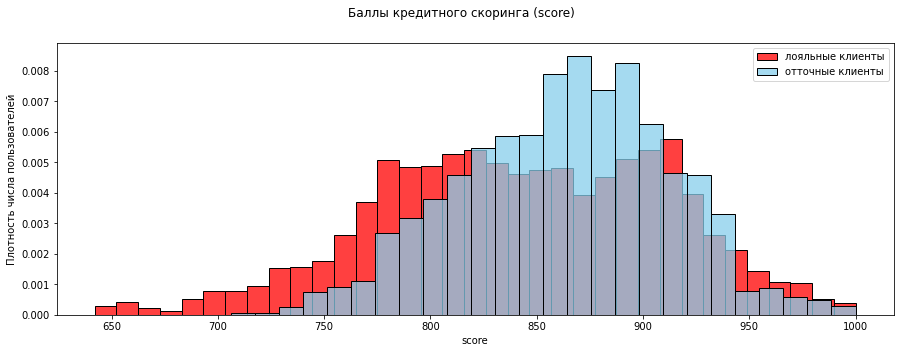

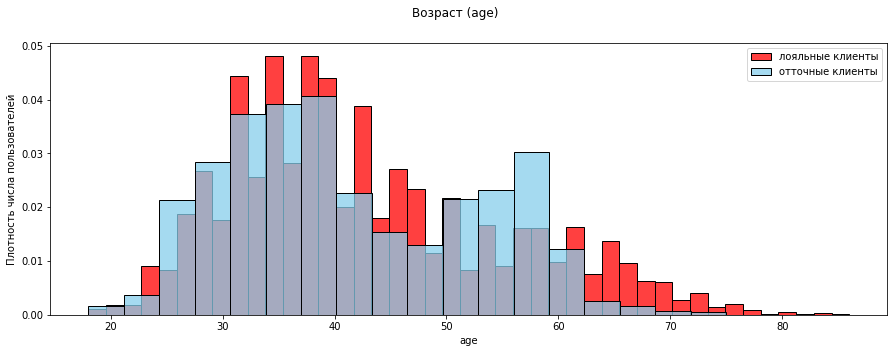

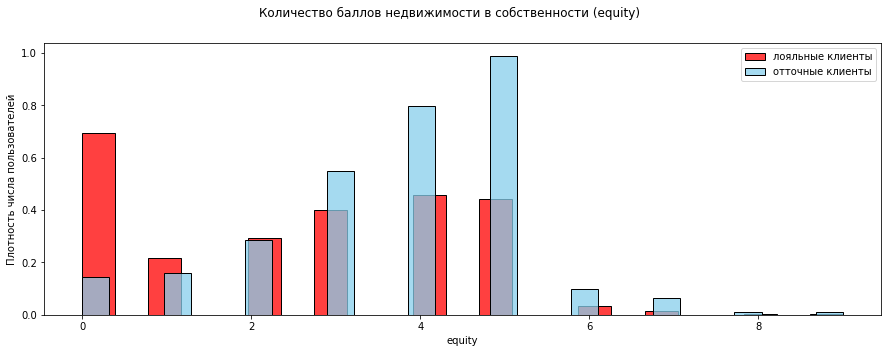

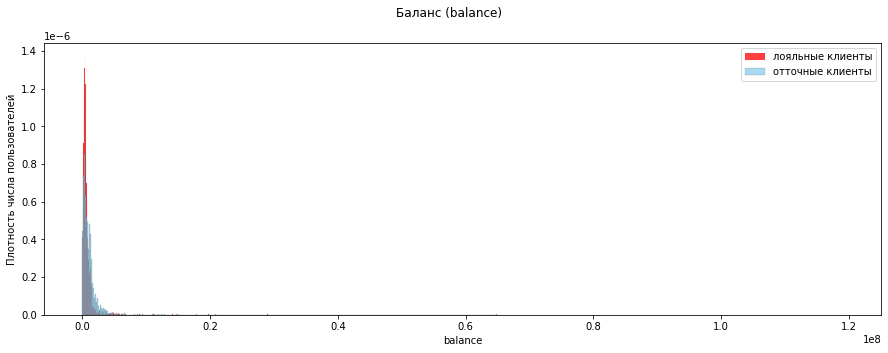

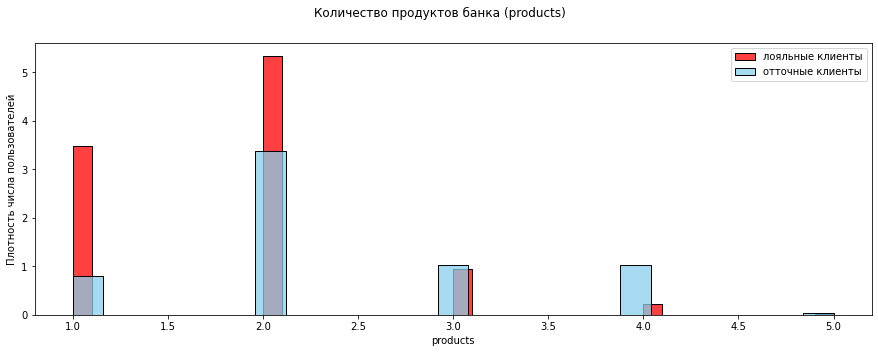

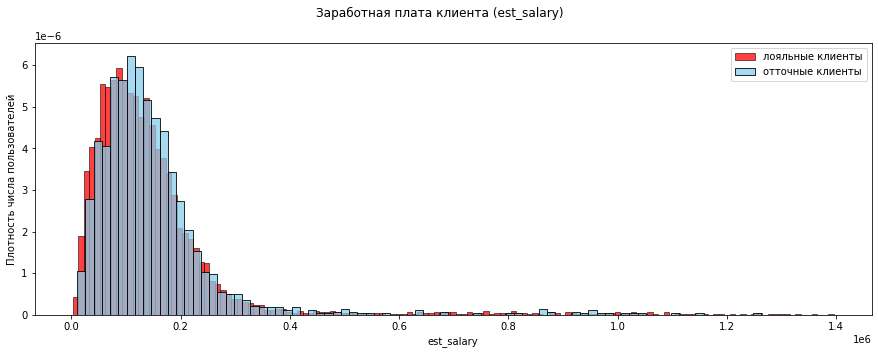

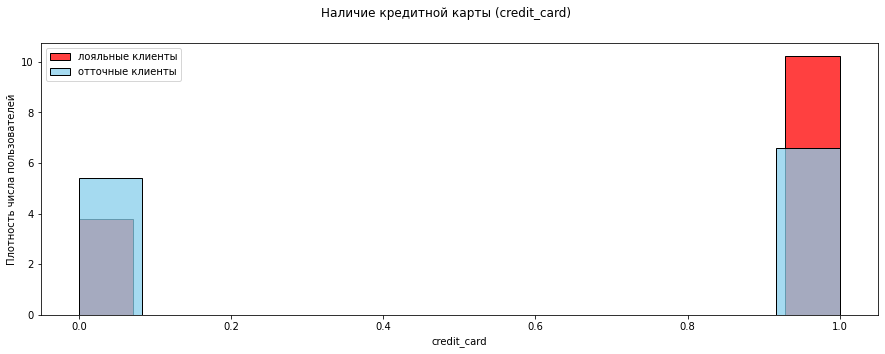

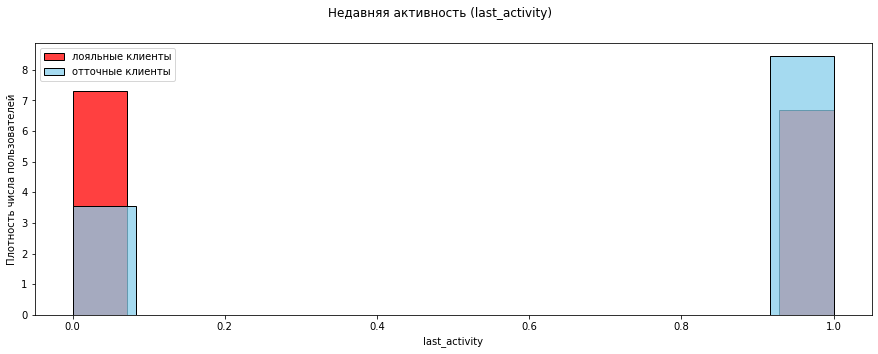

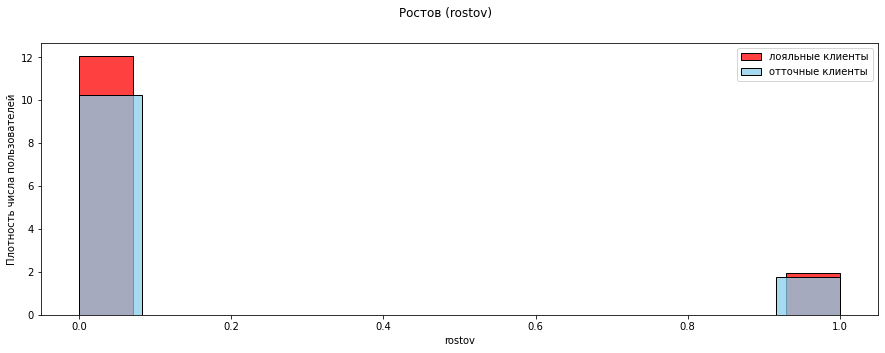

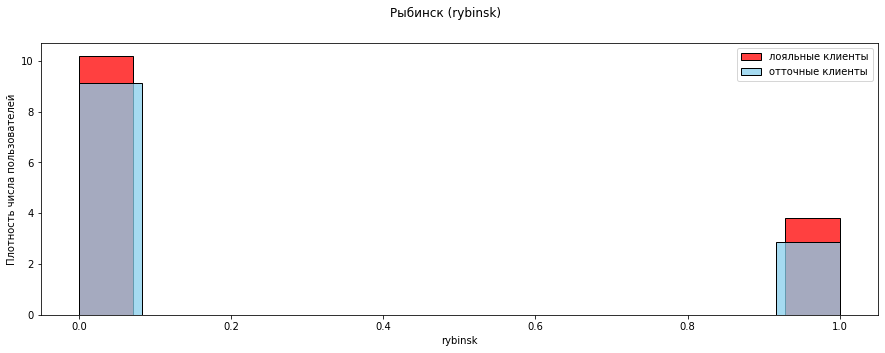

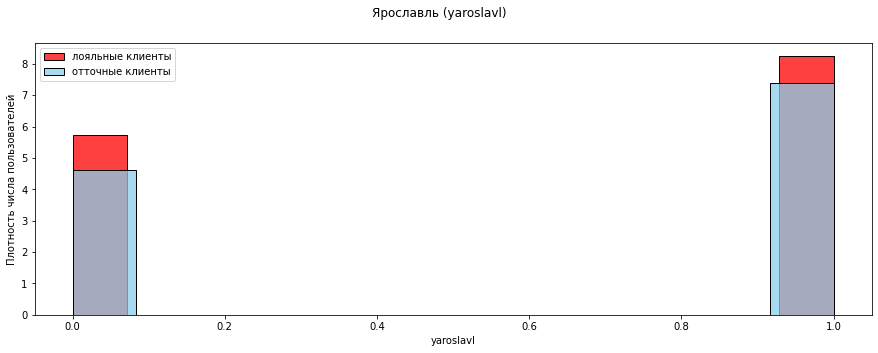

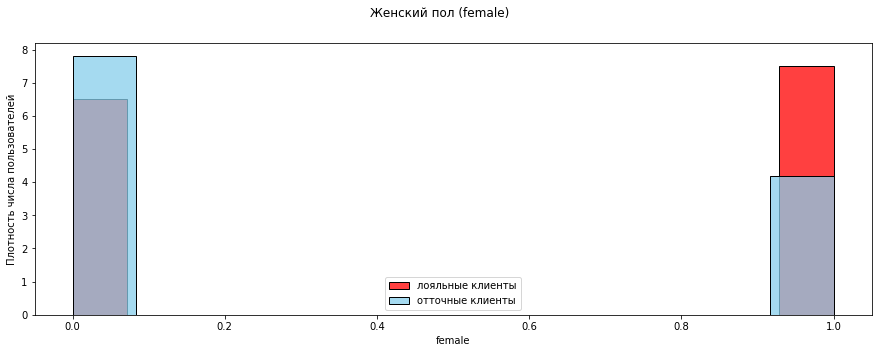

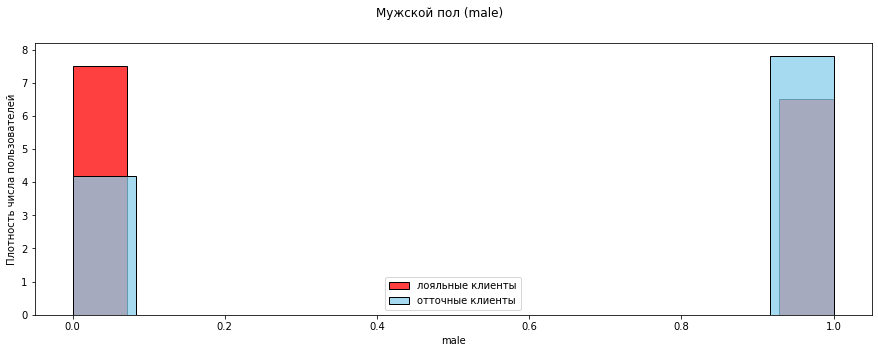

In [76]:
col_title = pd.DataFrame({'col' : ['score', 'age', 'equity', 'balance', 'products', 'est_salary', 'credit_card', 'last_activity', 'rostov', 'rybinsk', 'yaroslavl', 'female', 'male'], 
                        'title' : ['Баллы кредитного скоринга', 'Возраст', 
                                   'Количество баллов недвижимости в собственности', 
                                   'Баланс', 'Количество продуктов банка', 
                                   'Заработная плата клиента', 'Наличие кредитной карты', 'Недавняя активность', 'Ростов', 'Рыбинск', 'Ярославль', 'Женский пол', 'Мужской пол']
                       })

for index, row in col_title.iterrows():
    сol(df, row[0], row[1])

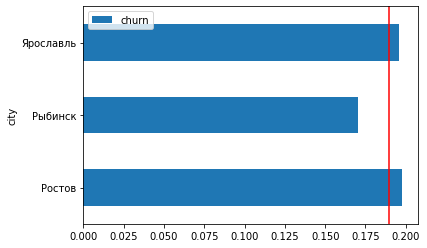

In [122]:
df.groupby('city').agg({'churn':'mean'}).plot(kind='barh').axvline(df.churn.mean(),c='red')
plt.show()

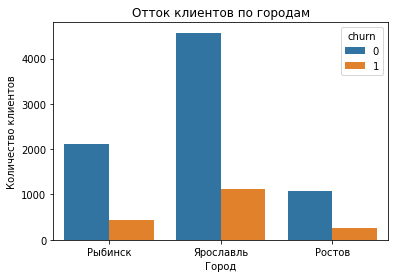

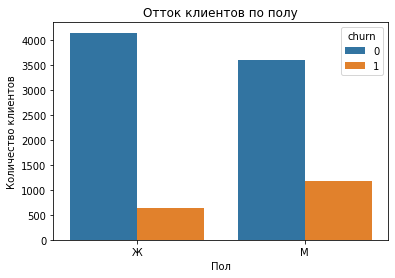

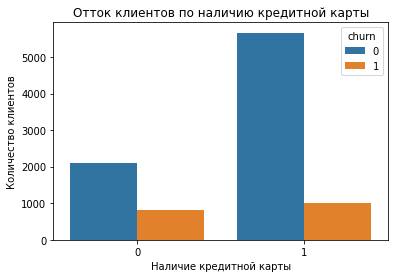

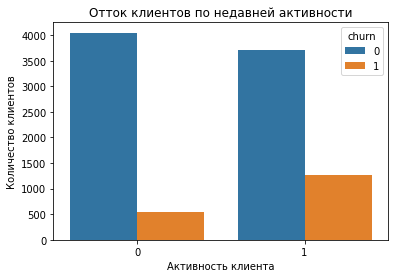

In [78]:
sns.countplot(x='city', hue='churn', data=df)
plt.title('Отток клиентов по городам')
plt.xlabel('Город')
plt.ylabel('Количество клиентов')
plt.show()

sns.countplot(x='gender', hue='churn', data=df)
plt.title('Отток клиентов по полу')
plt.xlabel('Пол')
plt.ylabel('Количество клиентов')
plt.show()

sns.countplot(x='credit_card', hue='churn', data=df)
plt.title('Отток клиентов по наличию кредитной карты')
plt.xlabel('Наличие кредитной карты')
plt.ylabel('Количество клиентов')
plt.show()

sns.countplot(x='last_activity', hue='churn', data=df)
plt.title('Отток клиентов по недавней активности')
plt.xlabel('Активность клиента')
plt.ylabel('Количество клиентов')
plt.show()

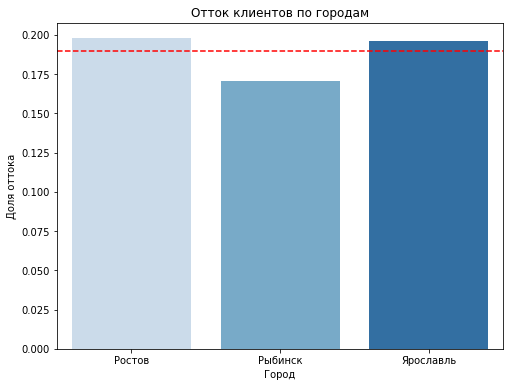

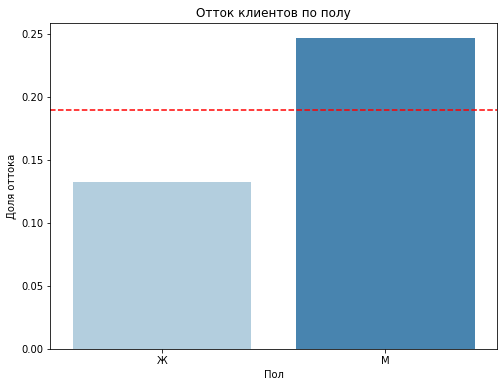

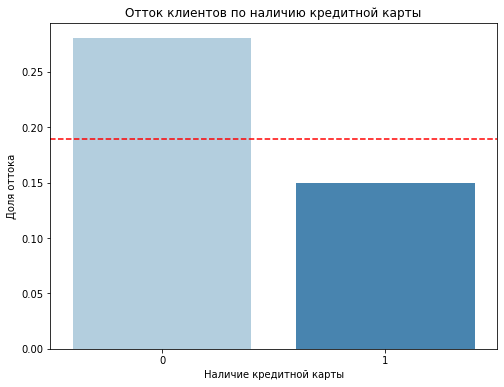

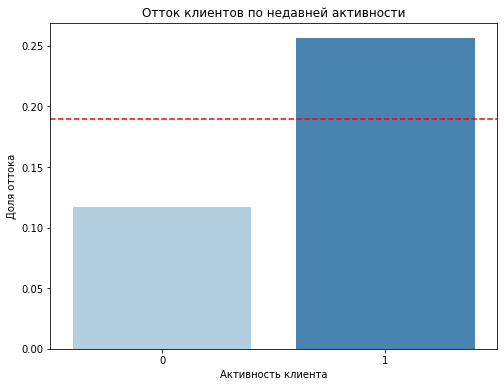

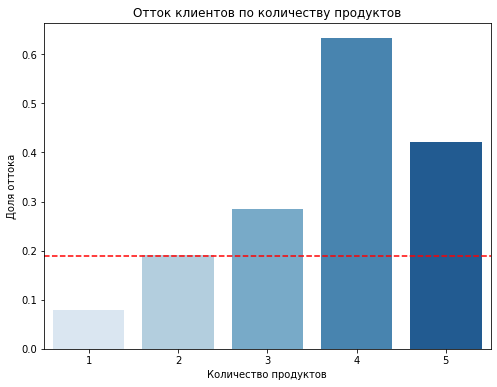

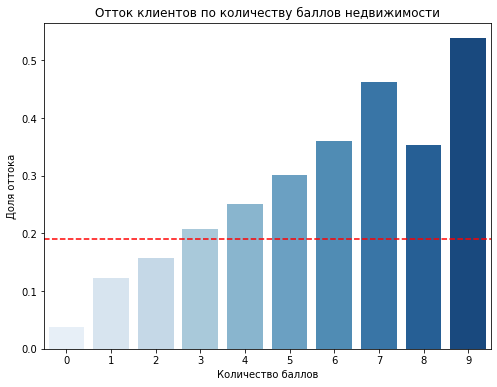

In [127]:
city_churn = df.groupby('city').agg({'churn':'mean'})
plt.figure(figsize=(8,6))
sns.barplot(x=city_churn.index, y=city_churn['churn'], palette='Blues')
plt.axhline(df.churn.mean(), color='red', linestyle='--')
plt.title('Отток клиентов по городам')
plt.xlabel('Город')
plt.ylabel('Доля оттока')
plt.show()

gender_churn = df.groupby('gender').agg({'churn':'mean'})
plt.figure(figsize=(8,6))
sns.barplot(x=gender_churn.index, y=gender_churn['churn'], palette='Blues')
plt.axhline(df.churn.mean(), color='red', linestyle='--')
plt.title('Отток клиентов по полу')
plt.xlabel('Пол')
plt.ylabel('Доля оттока')
plt.show()

cc_churn = df.groupby('credit_card').agg({'churn':'mean'})
plt.figure(figsize=(8,6))
sns.barplot(x=cc_churn.index, y=cc_churn['churn'], palette='Blues')
plt.axhline(df.churn.mean(), color='red', linestyle='--')
plt.title('Отток клиентов по наличию кредитной карты')
plt.xlabel('Наличие кредитной карты')
plt.ylabel('Доля оттока')
plt.show()

activity_churn = df.groupby('last_activity').agg({'churn':'mean'})
plt.figure(figsize=(8,6))
sns.barplot(x=activity_churn.index, y=activity_churn['churn'], palette='Blues')
plt.axhline(df.churn.mean(), color='red', linestyle='--')
plt.title('Отток клиентов по недавней активности')
plt.xlabel('Активность клиента')
plt.ylabel('Доля оттока')
plt.show()

products_churn = df.groupby('products').agg({'churn':'mean'})
plt.figure(figsize=(8,6))
sns.barplot(x=products_churn.index, y=products_churn['churn'], palette='Blues')
plt.axhline(df.churn.mean(), color='red', linestyle='--')
plt.title('Отток клиентов по количеству продуктов')
plt.xlabel('Количество продуктов')
plt.ylabel('Доля оттока')
plt.show()

equity_churn = df.groupby('equity').agg({'churn':'mean'})
plt.figure(figsize=(8,6))
sns.barplot(x=equity_churn.index, y=equity_churn['churn'], palette='Blues')
plt.axhline(df.churn.mean(), color='red', linestyle='--')
plt.title('Отток клиентов по количеству баллов недвижимости')
plt.xlabel('Количество баллов')
plt.ylabel('Доля оттока')
plt.show()

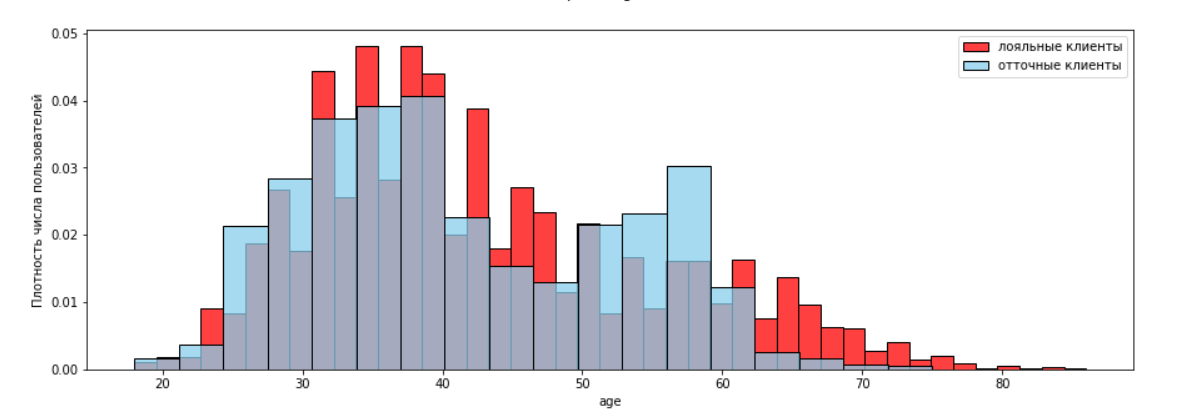

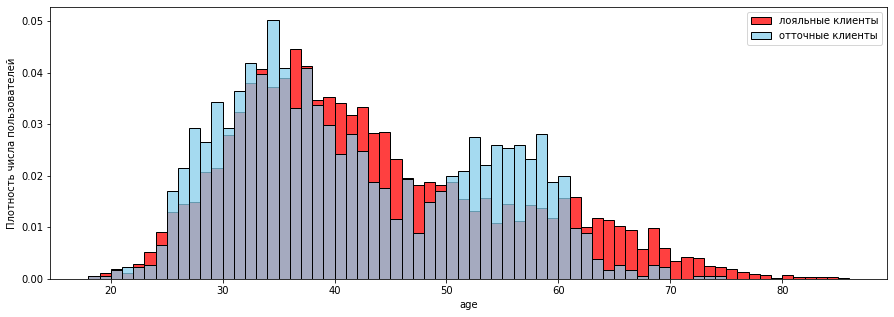

In [80]:
fig, ax = plt.subplots(figsize = (15, 5))
sns.histplot(df[df['churn']==0]['age'],label = 'лояльные клиенты', stat='density',common_norm=False, color = 'red', binwidth = 1)
sns.histplot(df[df['churn']==1]['age'], label = 'отточные клиенты',stat='density',common_norm=False, color = "skyblue", binwidth = 1)
plt.ylabel('Плотность числа пользователей')
plt.legend()
plt.show()

* По кредитному рейтингу клиентов можно условно разделить на три группы: первая (до 820 баллов) - преимущественно лояльная, вторая группа (820-940 рейтинг) - чаще отточные, после чего снова идут лояльные клиенты. Стоит отметить, что у отточных клиентов чаще рейтинг как раз в диапазоне 820-940, в то время как у лояльных он "размазан" по всем значениям, небольшой пик в районе 920 рейтинга. 
-------------
* По возрасту отточные клиенты больше всего "доминируют" в возрастной категории до 32 лет, после чего идут больше лояльные клиенты. В районе 50-60 лет отточных клиентов также больше лояльных. 
----------------

* Клиенты, у которых рейтинг собственности недвижимости меньше 2, очень лояльны. В свою очередь, если у клиента данный рейтинг от 2 и выше, то он будет скорее отточным, нежели лояльным.
-------------
* Клиенты, у которых в банке хранятся большие балансовые средства, как правило, лояльны. Пиковые значение у отточных клиентов на средней отметке по отношению к лояльным. 
------------

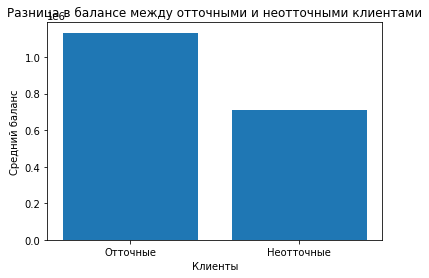

In [81]:
plt.bar(['Отточные', 'Неотточные'], [df[df['churn'] == 1]['balance'].mean(), df[df['churn'] == 0]['balance'].mean()])

plt.xlabel('Клиенты')
plt.ylabel('Средний баланс')
plt.title('Разница в балансе между отточными и неотточными клиентами')

plt.show()

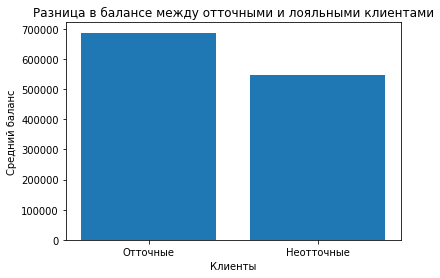

In [82]:
plt.bar(['Отточные', 'Неотточные'], [df[df['churn'] == 1]['balance'].clip(0, 1000000).mean(), df[df['churn'] == 0]['balance'].clip(0, 1000000).mean()])

plt.xlabel('Клиенты')
plt.ylabel('Средний баланс')
plt.title('Разница в балансе между отточными и лояльными клиентами')

plt.show()

* По количеству продуктов банке ситуация схожа с рейтингом недвижимости: клиенты, пользующие 1 и 2 продуктами в банке, лояльны, остальные - более отточны. 
--------------------
* По зарплате ситуация немного отличается от баланса - пиковые значения с небольшим перевесом у отточных клиентов. 
------------------
* Кредитные карты больше хранят лояльные клиенты. 

-----------------------
* По недавней активности ситуация иная - более активны отточные клиенты. 

----------------------

* По городам - в Ярославле и Рыбинске плотность лояльных клиентов больше, чем отточных. В обоих городах, с поправкой на объем клиентской базы, разница между отточными и лояльными на схожем уровне. В Ростове разница не такая, причины, почему так сложилось, неизвестны. 
------------------
* Женщины гораздо более лояльны, а мужчины, напротив, чаще отточны. 

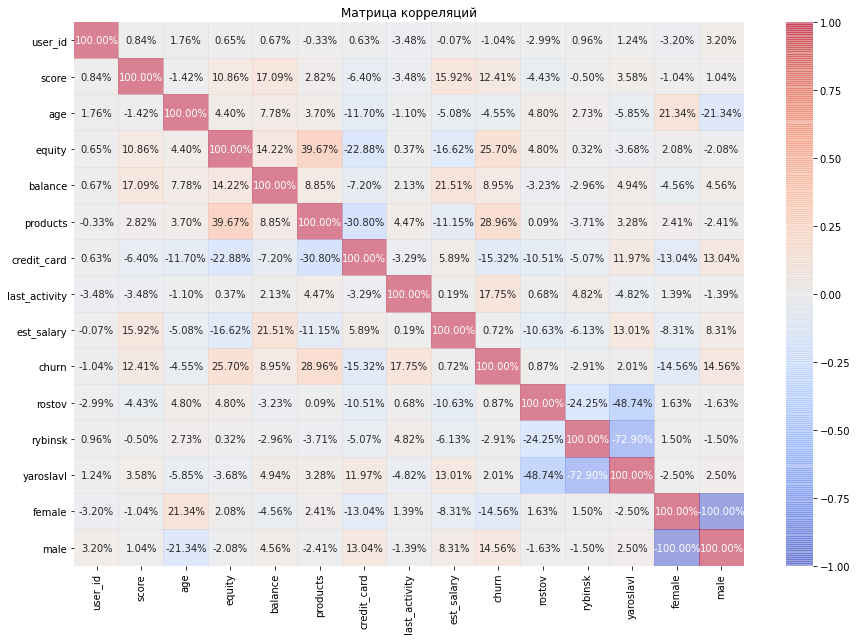

In [83]:
f, ax = plt.subplots(figsize=(15, 10))

sns.heatmap(df.corr(), annot=True, ax=ax, cmap="coolwarm", fmt='.2%', alpha=.5)

plt.title ('Матрица корреляций')
plt.show()

Больше всего, согласно матрице, показатель отточных клиентов коррелирует с кредитным рейтингом, рейтингом собственности, числом банковских продуктов, последней активностью и полом (мужчины более отточны). В целом, это наблюдение подтверждается графиками выше. Меньше всего коррелирует с возрастом, наличием кредитной карты и женским полом. 

In [84]:
df.groupby('churn').mean().T

churn,0,1
user_id,171923.238,171024.608
score,842.947,863.517
age,42.806,41.414
equity,2.500,3.776
balance,712111.332,1132582.018
products,1.797,2.380
credit_card,0.730,0.551
last_activity,0.478,0.704
est_salary,145457.123,147998.909
rostov,0.138,0.146


In [85]:
df.mean().T

user_id         171752.965
score              846.845
age                 42.542
equity               2.742
balance         791782.239
products             1.908
credit_card          0.696
last_activity        0.521
est_salary      145938.741
churn                0.189
rostov               0.139
rybinsk              0.266
yaroslavl            0.594
female               0.500
male                 0.500
dtype: float64

In [86]:
df['last_activity'].value_counts()

1    4980
0    4583
Name: last_activity, dtype: int64

Таким образом, среднестатический клиент банка это проживающий в Ярославле человек возрастом 33-36 лет, с кредитным рейтингом 850-900, имеющий от 0 до 5 баллов оценки недвижимости, 800 т.р. на балансе, пользующийся 1-2 банковскими продуктами, имеющий кредитную карту и в последнее время не активный. 

Скорее отточный клиент - мужчина, кредитный рейтинг выше среднего и ближе к 860-900, до 35 лет (либо 50-60 лет), рейтинг оценки недвижимости выше 3, в среднем на счету более 1 млн. рублей на счету, пользующийся более чем 2 банковскими продуктами, скорее не имеющий кредитную карту, скорее активный, имеющий среднюю зарплату выше 100 т.р. 

Скорее лояльный клиент - женщина, кредитный рейтинг около 840, 40+ лет, не имеющая рейтинг оценки недвижимости, имеющая на балансе 500-700 т.р., пользующаяся 1-2 банковскими продуктами, имеющая кредитную карту, малоактивная, проживающая в Ярославле. 

Предварительно, можем сделать следующий неутешительный вывод - оттекают преимущественно активные молодые клиенты, которые пользуются большим количеством банковских продуктов, имеющие высокую з.п. и хранящие много денег на счетах. Возможно, им как раз не хватает качества предоставляемых услуг в банке. При этом отделл, занимающийся выдачей кредитных карт, справляется на ура - их клиенты более лояльны. 

### На основе проведенного анализа и выявленных признаков "отточности" сформулировать две гипотезы (одна из них - доход между теми клиентами, которые ушли и теми, которые остались, не отличается) и проверить их.

Первая гипотеза оперделена - проверяем доход между двумя группами клиентов. Что касается второй гипотезы, кажется подозрительным разделение клиентов на отточных и лояльных в Ростове - в Рыбинске и Ярославе ситуация схожа, а в Ростове разница между группами минимальна. 

Для проверки гипотез будем использовать и тест Генри Манна и Доналда Уитни и t-тест. В качестве уровня статистической значимости установим 0,05. Если p-value превысит данный показатель, то подтверждаем нулевую гипотезу, в противном случае - альтернативную.

* Нулевая гипотеза H0 - Доход между теми клиентами, которые ушли и теми, которые остались, не отличается

* Альтернативная гипотеза H1 - различия между доходом двух групп есть.

In [87]:
churn = df.query('churn==1')
loyal = df.query('churn==0')

In [88]:
alpha = 0.05

results = st.mannwhitneyu(churn['est_salary'].tolist(), loyal['est_salary'].tolist())

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу')

p-значение:  1.2245231906555275e-05
Отвергаем нулевую гипотезу


In [89]:
alpha = 0.05

results = st.stats.ttest_ind(df[df['churn'] == 0]['est_salary'], df[df['churn'] == 1]['est_salary'])

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение:  0.4788939619418633
Не получилось отвергнуть нулевую гипотезу


/tmp/ipykernel_168/2861593726.py:3: DeprecationWarning: Please use `ttest_ind` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  results = st.stats.ttest_ind(df[df['churn'] == 0]['est_salary'], df[df['churn'] == 1]['est_salary'])


Примечательно, что два теста дают разный результат. Поскольку t-тест используется при нормальном распределении данных, а тест Манна-Уитни для сравнения медиан двух независимых выборок, то здесь, с учетом того, что пропусков в est_salary нет, и данные распределены нормально будет корректнее опираться на результаты t-теста, поэтому будем считать, что гипотеза подтверждена. 

In [90]:
from scipy.stats import kurtosis, skew


print('Эксцесс для лояльных', kurtosis(df[df['churn'] == 0]['est_salary']))

print('Асимметрия для лояльных', skew(df[df['churn'] == 0]['est_salary']))

print('Эксцесс для отточных', kurtosis(df[df['churn'] == 1]['est_salary']))

print('Асимметрия для отточных', skew(df[df['churn'] == 1]['est_salary']))

Эксцесс для лояльных 22.983751546529508
Асимметрия для лояльных 4.180824314784717
Эксцесс для отточных 24.74141043452331
Асимметрия для отточных 4.1868818224134365


* Нулевая гипотеза H0 - Количество отточных и лояльных клиентов в Ростове не различается

* Альтернативная гипотеза H1 - Различия между группами есть

In [91]:
#z_score, p_value = proportion.proportions_ztest([churn_count, loyal_count], [total_count, total_count])

#print('z-тест: ', z_score)
#print('p-значение: ', p_value)

#alpha = 0.05

#if p_value < alpha:
   # print('Отвергаем нулевую гипотезу')
#else:
    #print('Не получилось отвергнуть нулевую гипотезу')

In [92]:
churn_count = len(churn)
loyal_count = len(loyal)
churn_rostov_count = len(churn[churn['rostov'] == 1])
loyal_rostov_count = len(loyal[loyal['rostov'] == 1])
print(churn_count, loyal_count, churn_rostov_count, loyal_rostov_count)

1812 7751 264 1070


In [93]:
alpha = .05 # критический уровень статистической значимости

successes = np.array([264, 1070])
trials = np.array([1812, 7751])

# пропорция успехов в первой группе:
p1 = successes[0]/trials[0]

# пропорция успехов во второй группе:
p2 = successes[1]/trials[1]

# пропорция успехов в комбинированном датасете:
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

# разница пропорций в датасетах
difference = p1 - p2 

# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1)  

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
    ) 

p-значение:  0.3975325061219528
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Здесь результаты двух тестов практически идентичны, вероятно, связано с тем, что был взят столбец с бинарными данными. Оба теста подтверждают нулевую гипотезу. 

Таким образом, выяснили, что доходы между отточными и лояльными клиентами, как и их количество в Ростове не различается. 

### Сегментация клиентов по группам

Цель - определить максимально большие и максимально отточные группы клиентов, работа с которыми позволит уменьшить эту отточность.

На основе прошлого анализа можно выделить следующие признаки отточности:

* score - выше 850 (либо в диапазоне от 850 до 900);

* city - в Ярославле и Рыбинске лояльных клиентов больше отточных, в Ростове их поровну. Данный признак рассматривать не будем;

* gender - отточны клиенты мужского пола;

* age - клиенты младше 35 лет, либо в диапазоне от 50 до 60;

* equity - рейтинг недвижимости от 2 и выше;

* balance - более 1 млн. рублей на счету;

* products - от 2 и более банковских продуктов; 

* credit_card - отточные не имеют кредитных карт; 

* last_activity - отточные активны в последнее время;

* est_salary - зарплаты от 100 000 р.

In [96]:
df.query('male == 1 and age <= 35').agg({"churn":["mean","sum","count"]})

,churn
mean,0.257
sum,478.000
count,1860.000


In [97]:
df.query('male == 1 and score >= 880').agg({"churn":["mean","sum","count"]})

,churn
mean,0.262
sum,463.000
count,1766.000


In [98]:
df.query('male == 1 and equity >= 3').agg({"churn":["mean","sum","count"]})

,churn
mean,0.355
sum,967.000
count,2726.000


In [99]:
df.query('male == 1 and balance >= 1000000').agg({"churn":["mean","sum","count"]})

,churn
mean,0.433
sum,478.000
count,1105.000


In [100]:
df.query('male == 1 and products >= 2').agg({"churn":["mean","sum","count"]})

,churn
mean,0.317
sum,1010.000
count,3187.000


In [101]:
df.query('male == 1 and credit_card == 0').agg({"churn":["mean","sum","count"]})

,churn
mean,0.391
sum,456.000
count,1165.000


In [102]:
df.query('male == 1 and last_activity == 1').agg({"churn":["mean","sum","count"]})

,churn
mean,0.314
sum,771.000
count,2457.000


In [103]:
df.query('male == 1 and est_salary >= 120000').agg({"churn":["mean","sum","count"]})

,churn
mean,0.244
sum,633.000
count,2589.000


In [104]:
df.query('male == 1 and rostov == 1').agg({"churn":["mean","sum","count"]})

,churn
mean,0.272
sum,174.000
count,640.000


Возьмем те признаки, которые показали себя лучше всего

In [105]:
df.query('male == 1 and balance >= 1000000 and credit_card == 0').agg({"churn":["mean","sum","count"]})

,churn
mean,0.541
sum,253.000
count,468.000


In [106]:
df.query('male == 1 and balance >= 1000000 and equity >= 2').agg({"churn":["mean","sum","count"]})

,churn
mean,0.492
sum,473.000
count,961.000


In [107]:
df.query('male == 1 and balance >= 1000000 and credit_card == 0 and equity >= 2').agg({"churn":["mean","sum","count"]})

,churn
mean,0.571
sum,253.000
count,443.000


Первый сегмент отточных клиентов - мужчина с балансом на счете более 1 млн. рублей, не имеющий кредитной карты и получивший рейтинг оценки стоимости от 2 баллов. Всего таких в датасете - 443 клиента, из них 57% - отточные.

In [108]:
df.query('age <= 35').agg({"churn":["mean","sum","count"]})

,churn
mean,0.218
sum,695.000
count,3187.000


In [109]:
df.query('age <= 35 and score >= 860').agg({"churn":["mean","sum","count"]})

,churn
mean,0.304
sum,461.000
count,1514.000


In [110]:
df.query('last_activity == 1').agg({"churn":["mean","sum","count"]})

,churn
mean,0.256
sum,1276.000
count,4980.000


In [111]:
df.query('est_salary >= 100000').agg({"churn":["mean","sum","count"]})

,churn
mean,0.207
sum,1189.000
count,5756.000


In [112]:
df.query('products >= 2').agg({"churn":["mean","sum","count"]})

,churn
mean,0.238
sum,1581.000
count,6641.000


In [113]:
df.query('last_activity == 1 and est_salary >= 100000 and products >= 2').agg({"churn":["mean","sum","count"]})

,churn
mean,0.410
sum,771.000
count,1882.000


In [114]:
df.query('last_activity == 1 and est_salary >= 100000 and products >= 3').agg({"churn":["mean","sum","count"]})

,churn
mean,0.601
sum,268.000
count,446.000


Второй сегмент - клиенты, недавно активные, со средней з.п. выше 100000 руб., пользующиеся более чем 2 продуктами. Всего - 1885 чел., из них отточные 771 (40%). N.B.: значительное количество клиентов пользуются 2 продуктами. Если мы берем группу клиентов с 3 банковскими продуктами, то наш сегмент значительно сокращается (до 447 чел.), при этом % отточности возрастает до 60% (268 клиентов). 

In [115]:
df.query('score >= 850').agg({"churn":["mean","sum","count"]})

,churn
mean,0.239
sum,1143.000
count,4786.000


In [116]:
df.query('age <= 35').agg({"churn":["mean","sum","count"]})

,churn
mean,0.218
sum,695.000
count,3187.000


In [117]:
df.query('51 <= age <= 61').agg({"churn":["mean","sum","count"]})

,churn
mean,0.276
sum,449.000
count,1627.000


In [118]:
df.query('850 <= score <= 900').agg({"churn":["mean","sum","count"]})

,churn
mean,0.279
sum,722.000
count,2590.000


In [119]:
df.query('850 <= score <= 900 and (age <= 35 or 50 <= age <= 60)').agg({"churn":["mean","sum","count"]})

,churn
mean,0.344
sum,476.000
count,1384.000


Третий сегмент - люди 35 лет и младше, а также в возрасте от 50 до 60 лет (молодежь и предпенсионный возраст), с кредитным рейтингом от 850 до 900 - всего 1397 человек, отточны 34% (476 человек). 

Итак, есть три сегмента:
    
    * Первый сегмент отточных клиентов - мужчина с балансом на счете более 1 млн. рублей, не имеющий кредитной карты и получивший рейтинг оценки стоимости от 2 баллов. Всего таких в датасете - 443 клиента, из них 57% - отточные;
    
    * Второй сегмент - клиенты, недавно активные, со средней з.п. выше 100000 руб., пользующиеся более чем 2 продуктами. Всего - 1885 чел., из них отточные 771 (40%). N.B.: значительное количество клиентов пользуются 2 продуктами. Если мы берем группу клиентов с 3 банковскими продуктами, то наш сегмент значительно сокращается (до 447 чел.), при этом % отточности возрастает до 60% (268 клиентов); 
    
    * Третий сегмент - люди 35 лет и младше, а также в возрасте от 50 до 60 лет (молодежь и предпенсионный возраст), с кредитным рейтингом от 850 до 900 - всего 1397 человек, отточны 34% (476 человек). 

### Итоги

Среднестатический клиент банка это:

    - проживающий в Ярославле человек возрастом 33-36 лет, с кредитным рейтингом 850-900, имеющий от 0 до 5 баллов оценки недвижимости, 800 т.р. на балансе, пользующийся 1-2 банковскими продуктами, имеющий кредитную карту и в последнее время не активный. 

Средний лояльный клиент это: 

    - женщина, кредитный рейтинг около 840, 40+ лет, не имеющая рейтинг оценки недвижимости, имеющая на балансе 500-700 т.р., пользующаяся 1-2 банковскими продуктами, имеющая кредитную карту, малоактивная, проживающая в Ярославле.
    
Средний отточный клиент: 

    - мужчина, кредитный рейтинг выше среднего и ближе к 860-900, до 35 лет (либо 50-60 лет), рейтинг оценки недвижимости выше 3, в среднем на счету более 1 млн. рублей на счету, пользующийся более чем 2 банковскими продуктами, скорее не имеющий кредитную карту, скорее активный, имеющий среднюю зарплату выше 100 т.р.


Оттекают преимущественно активные молодые клиенты, которые пользуются большим количеством банковских продуктов, имеющие высокую з.п. и хранящие много денег на счетах.

    - Первый сегмент отточных клиентов - мужчина с балансом на счете более 1 млн. рублей, не имеющий кредитной карты и получивший рейтинг оценки стоимости от 2 баллов. Всего таких в датасете - 443 клиента, из них 57% - отточные.

    - Второй сегмент - клиенты, недавно активные, со средней з.п. выше 100000 руб., пользующиеся более чем 2 продуктами. Всего - 1885 чел., из них отточные 771 (40%). N.B.: значительное количество клиентов пользуются 2 продуктами. Если мы берем группу клиентов с 3 банковскими продуктами, то наш сегмент значительно сокращается (до 447 чел.), при этом % отточности возрастает до 60% (268 клиентов). 

    - Третий сегмент - люди 35 лет и младше, а также в возрасте от 50 до 60 лет (молодежь и предпенсионный возраст), с кредитным рейтингом от 850 до 900 - всего 1397 человек, отточны 34% (476 человек). 

Что можем предложить: 

* Первому сегменту клиентов - льготные дебетовые продукты, повышенные проценты на вклады. Возможно, получится заинтересовать их льготными кредитными предложениями на приобретение недвижимости в качестве инвестиции для ее последующей сдачи в аренду.

* Второму сегменту клиентов - расширенный пакет премиум-услуг для тех пользователей, кто получает зарплату на счет в банке. Различные дополнительные функции на каждый день - кешбек, скидки. Рассмотреть возможность добавления каких-то мини-викторин с получением призов в мобильном приложении. 

* Третьем сегменту клиентов - предложить льготные ипотеки на приобретение недвижимости (под лозунгом "первое жилье" - подойдет как для молодежной группы, так и для поколения 50-60 лет, у которых подрастают дети).

Учитывая, что первые два сегмента сравнительно небольшие, затраты на льготы и акции себя окупят. Наши лояльные клиенты предпочитают кредитные карты и не хранят много средств на счету. Соответственно, нужно делать акцент на предложении приобретения отточными клиентами дорогостоящих недвижимых активов в кредит. 